<h1> The Challenge:</h1>

Based off this dataset with school financial, enrollment, and achievement data, we are interested in what information is a useful indicator of student performance at the state level.

This question is a bit too big for a checkpoint, however. Instead, we want you to look at smaller questions related to our overall goal. Here's the overview:

1. Choose a specific test to focus on
>Math/Reading for 4/8 grade
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create 2 well-labeled visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Pick if you want to do a regression or classification task. For both cases, defined _exactly_ what you want to predict, and pick any model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a> and <a href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">classifiers</a>).
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

** Include comments throughout your code! Every cleanup and preprocessing task should be documented.


Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# feel free to import other libraries! 

In [2]:
#Read in Data
df = pd.read_csv('states_edu.csv')
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


Chosen test: **8th Grade Math**

<h2> Cleanup (optional)</h2>

_Use this space to rename columns, deal with missing data, etc._

In [3]:
#Drop all the rows with null values
df = df.dropna()

<h2> Feature Selection </h2>

_Use this space to modify or create features_

In [4]:
#Expenditure per student is a ratio of instructional and support service expenditure to 8th grade enrollment
df["Expenditure_per_student"] = pd.to_numeric((df["TOTAL_EXPENDITURE"]) - df["OTHER_EXPENDITURE"]) / pd.to_numeric(df["GRADES_8_G"])

#Revenue per student is a ratio of total revenue to 8th grade enrollment
df["Revenue_per_student"] = pd.to_numeric(df["TOTAL_REVENUE"]) / pd.to_numeric(df["GRADES_8_G"])

#Education expenditure ratio is the proportion of total revnue being allocated to instructional expenditure
df["Ed_Expenditure_ratio"] = pd.to_numeric((df["INSTRUCTION_EXPENDITURE"])) / pd.to_numeric((df["TOTAL_EXPENDITURE"]))

#Print the correlation between these features and 8th grade math scores
print(np.corrcoef(df["Ed_Expenditure_ratio"], df["AVG_MATH_8_SCORE"]))
print(np.corrcoef(df["Expenditure_per_student"], df["AVG_MATH_8_SCORE"]))
print(np.corrcoef(df["Revenue_per_student"], df["AVG_MATH_8_SCORE"]))

[[1.         0.22749436]
 [0.22749436 1.        ]]
[[1.         0.28500944]
 [0.28500944 1.        ]]
[[1.         0.27319686]
 [0.27319686 1.        ]]


Final feature list: **Adjusted educational expenditure per (8th grade) student, Revenue per (8th grade) student, Education to total expenditure ratio**

Feature selection justification: **There seems to be a slight correlation between these features and the 8th grade math scores, so it's a relationship I'm interested in exploring further**

<h2> EDA </h2>

Visualization 1

Text(0, 0.5, 'Frequency')

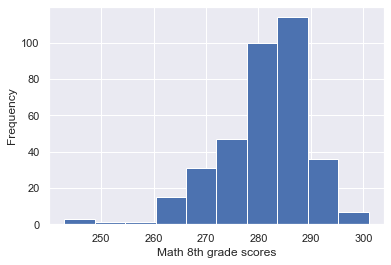

In [5]:
df["AVG_MATH_8_SCORE"].hist()
plt.xlabel("Math 8th grade scores")
plt.ylabel("Frequency")

**This graph is merely a simple histogram of 8th grade math scores so we can see the distribution and its shape**

Visualization 2

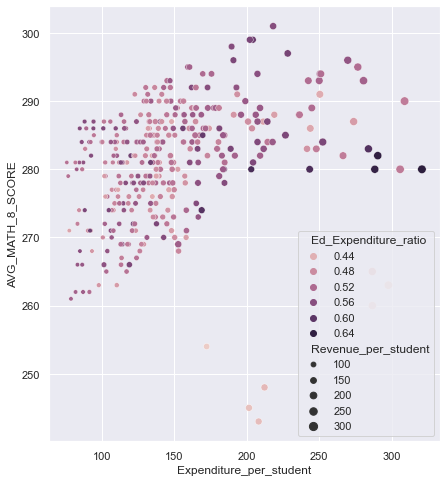

In [6]:
plt.figure(figsize = (7,8))
sns.scatterplot(x="Expenditure_per_student", y="AVG_MATH_8_SCORE", data=df, hue = "Ed_Expenditure_ratio", size= "Revenue_per_student")
plt.show()

**This graph plots 8th grade math scores against expenditure per student, while also showing relationships with other features**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X = df[["Expenditure_per_student","Revenue_per_student", "Ed_Expenditure_ratio"]]
y = df.loc[X.index]["AVG_MATH_8_SCORE"]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.20, random_state=0)

<h2> Prediction </h2>

Chosen ML task: **REGRESSION**

In [10]:
# import your sklearn class here
import sklearn as sk
from sklearn.linear_model import LinearRegression

In [11]:
# create your model here
#I'm using a linear regression because it's more intuitive to me
model = LinearRegression()

In [12]:
model.fit(X_train, y_train)

LinearRegression()

In [13]:
#This tells us how much each feature impacts 8th grade math scores, and what our y-intercept is
print(model.intercept_)
print(model.coef_)

253.92424779797642
[ 0.10387909 -0.0443552  35.92164882]


In [14]:
y_pred = model.predict(X_test)

In [15]:
# for classification:
#from sklearn.metrics import plot_confusion_matrix

#plot_confusion_matrix(model, X_test, y_test,cmap=plt.cm.Blues)

Text(0, 0.5, '8th Grade Math Scores')

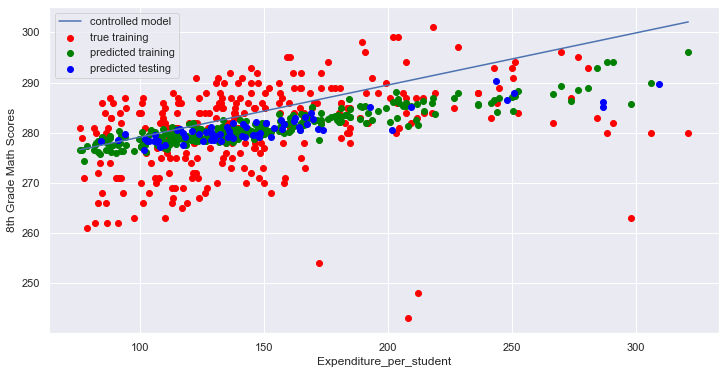

In [16]:
# for regression: (pick a single column to visualize results)

# Results from this graph _should not_ be used as a part of your results -- it is just here to help with intuition. 
# Instead, look at the error values and individual intercepts.


col_name = "Expenditure_per_student"
col_index = X_train.columns.get_loc(col_name)

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")
plt.scatter(X_test[col_name], model.predict(X_test), color = "blue")

new_x = np.linspace(X_train[col_name].min(),X_train[col_name].max(),200)
intercept = model.predict([X_train.sort_values(col_name).iloc[0]]) - X_train[col_name].min()*model.coef_[col_index]
plt.plot(new_x, intercept+new_x*model.coef_[col_index])

plt.legend(['controlled model','true training','predicted training','predicted testing'])
plt.xlabel(col_name)
plt.ylabel("8th Grade Math Scores")

<h2> Summary </h2>

#### Checkpoint 3 Summary:
I first started by removing the majority of the null value rows and creating some new features. I was really interested in exploring the education expenditure as a proportion of total expenditure, the actual state revenue, and the education expenditure per student, so I made three new df columns for each one. I then proceeded to plot some of these variables and decided I wanted to use a linear regression for simplicity's sake. My model predicted that there was a slight positive relationship between educational and support service expenditure per student, educational spending per total spending, and 8th grade math performance. Ultimately, I would advised, based on my model, that to improve 8th grade math scores to both increase educational spending per capita and allocate a larger portion of a budget towards educational spending. 